In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('../seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


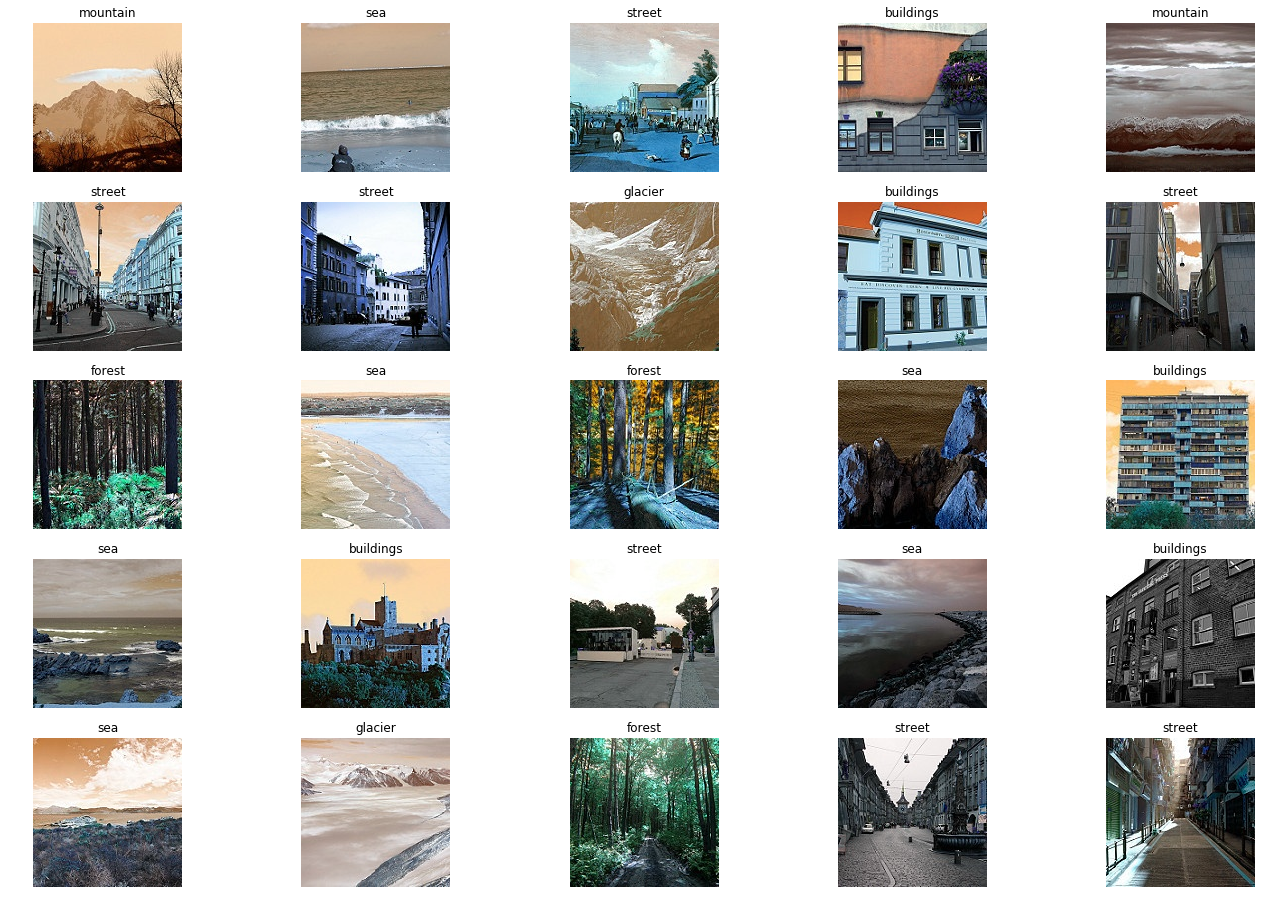

In [6]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Now, Create the CNN model to predict the class labels.This is the basic CNN model.

In [7]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        45050     
__________

In [10]:
trained = model.fit(Images,Labels,epochs=15,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.1421 - acc: 0.5551 - val_loss: 0.8380 - val_acc: 0.6927
Epoch 2/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.0061 - acc: 0.6260 - val_loss: 0.9080 - val_acc: 0.6735
Epoch 3/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.9115 - acc: 0.6690 - val_loss: 0.7556 - val_acc: 0.7138
Epoch 4/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.8259 - acc: 0.7047 - val_loss: 0.7411 - val_acc: 0.7466
Epoch 5/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.7548 - acc: 0.7416 - val_loss: 0.6744 - val_acc: 0.7732
Epoch 6/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.6982 - acc: 0.7574 - val_loss: 0.5935 - val_acc: 0.7780
Epoch 7/15
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.6440 - acc: 0.7828 - val_loss: 0.6203 - val_acc: 

In [41]:
model = Models.Sequential()
model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(4, 4))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(4, 4))
model.add(Layers.Flatten())
model.add(Layers.Dense(150,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [42]:
trained = model.fit(Images,Labels,epochs=15,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/15
9823/9823 [==============================] - 42s 4ms/sample - loss: 1.5114 - acc: 0.4088 - val_loss: 0.9787 - val_acc: 0.6089
Epoch 2/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 1.0650 - acc: 0.5765 - val_loss: 0.9234 - val_acc: 0.6357
Epoch 3/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 0.9809 - acc: 0.6163 - val_loss: 0.9778 - val_acc: 0.6160
Epoch 4/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 0.8993 - acc: 0.6454 - val_loss: 0.8196 - val_acc: 0.6678
Epoch 5/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 0.8351 - acc: 0.6806 - val_loss: 0.7106 - val_acc: 0.7236
Epoch 6/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 0.8000 - acc: 0.7013 - val_loss: 0.6854 - val_acc: 0.7395
Epoch 7/15
9823/9823 [==============================] - 39s 4ms/sample - loss: 0.7260 - acc: 0.7357 - val_loss: 0.7597 - val_acc: 

In [43]:
model = Models.Sequential()
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(4, 4))
model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(4, 4))
model.add(Layers.Flatten())
model.add(Layers.Dense(150,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [44]:
trained = model.fit(Images,Labels,epochs=15,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/15
9823/9823 [==============================] - 18s 2ms/sample - loss: 2.0732 - acc: 0.4042 - val_loss: 0.9437 - val_acc: 0.6227
Epoch 2/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 1.0006 - acc: 0.6015 - val_loss: 0.8694 - val_acc: 0.6509
Epoch 3/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 0.8786 - acc: 0.6621 - val_loss: 0.7200 - val_acc: 0.7257
Epoch 4/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 0.7921 - acc: 0.7098 - val_loss: 0.8641 - val_acc: 0.6780
Epoch 5/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 0.7299 - acc: 0.7382 - val_loss: 0.7036 - val_acc: 0.7369
Epoch 6/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 0.6666 - acc: 0.7634 - val_loss: 0.8335 - val_acc: 0.7245
Epoch 7/15
9823/9823 [==============================] - 17s 2ms/sample - loss: 0.6334 - acc: 0.7762 - val_loss: 0.7172 - val_acc: 

In [110]:
model = Models.Sequential()
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(120,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(250,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(150,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [111]:
trained = model.fit(Images,Labels,epochs=15,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/15
9823/9823 [==============================] - 24s 2ms/sample - loss: 1.3820 - acc: 0.4556 - val_loss: 0.9511 - val_acc: 0.6063
Epoch 2/15
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.9863 - acc: 0.6150 - val_loss: 0.7974 - val_acc: 0.6744
Epoch 3/15
9823/9823 [==============================] - 21s 2ms/sample - loss: 0.8812 - acc: 0.6726 - val_loss: 0.7117 - val_acc: 0.7347
Epoch 4/15
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.7500 - acc: 0.7250 - val_loss: 0.6187 - val_acc: 0.7822
Epoch 5/15
9823/9823 [==============================] - 21s 2ms/sample - loss: 0.6805 - acc: 0.7648 - val_loss: 0.5848 - val_acc: 0.7946
Epoch 6/15
9823/9823 [==============================] - 21s 2ms/sample - loss: 0.6128 - acc: 0.7926 - val_loss: 0.6096 - val_acc: 0.7922
Epoch 7/15
9823/9823 [==============================] - 21s 2ms/sample - loss: 0.5793 - acc: 0.8025 - val_loss: 0.6115 - val_acc: 

In [142]:
model = Models.Sequential()
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5, 5))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(120,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(150,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5, 5))
model.add(Layers.Flatten())
model.add(Layers.Dense(150,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [143]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 23s 2ms/sample - loss: 1.6260 - acc: 0.4595 - val_loss: 0.9196 - val_acc: 0.6229
Epoch 2/35
9823/9823 [==============================] - 20s 2ms/sample - loss: 1.0105 - acc: 0.5998 - val_loss: 0.8224 - val_acc: 0.6671
Epoch 3/35
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.8622 - acc: 0.6803 - val_loss: 0.7038 - val_acc: 0.7383
Epoch 4/35
9823/9823 [==============================] - 19s 2ms/sample - loss: 0.7780 - acc: 0.7231 - val_loss: 0.6570 - val_acc: 0.7670
Epoch 5/35
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.6871 - acc: 0.7647 - val_loss: 0.6744 - val_acc: 0.7628
Epoch 6/35
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.6425 - acc: 0.7810 - val_loss: 0.6105 - val_acc: 0.7846
Epoch 7/35
9823/9823 [==============================] - 20s 2ms/sample - loss: 0.5768 - acc: 0.8060 - val_loss: 0.5639 - val_acc: 

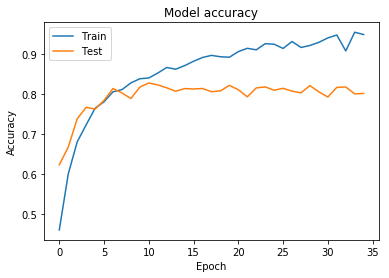

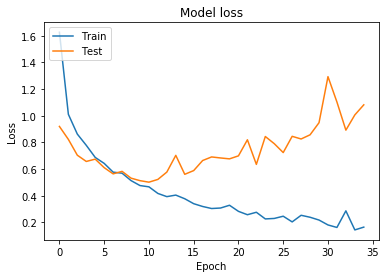

In [144]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

To evaluate a model, there are many methods are proposed to evaluate the model. I use Accuracy to evaluate the performance of my model.

In [146]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='my_best_model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_525 (Conv2D)          (None, 148, 148, 50)      1400      
_________________________________________________________________
conv2d_526 (Conv2D)          (None, 146, 146, 100)     45100     
_________________________________________________________________
max_pooling2d_191 (MaxPoolin (None, 29, 29, 100)       0         
_________________________________________________________________
conv2d_527 (Conv2D)          (None, 27, 27, 100)       90100     
_________________________________________________________________
conv2d_528 (Conv2D)          (None, 25, 25, 120)       108120    
_________________________________________________________________
conv2d_529 (Conv2D)          (None, 23, 23, 150)       162150    
_________________________________________________________________
conv2d_530 (Conv2D)          (None, 21, 21, 200)       270200    
__________

In [145]:
test_images,test_labels = get_images('../seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 2s 809us/sample - loss: 1.0801 - acc: 0.7943


[1.0800516160329183, 0.79433334]

Lets predict the images from the "pred" folder.

In [147]:
pred_images,no_labels = get_images('../seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

Following image shows the predicted class label on top of the image and probabilities below of the image.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


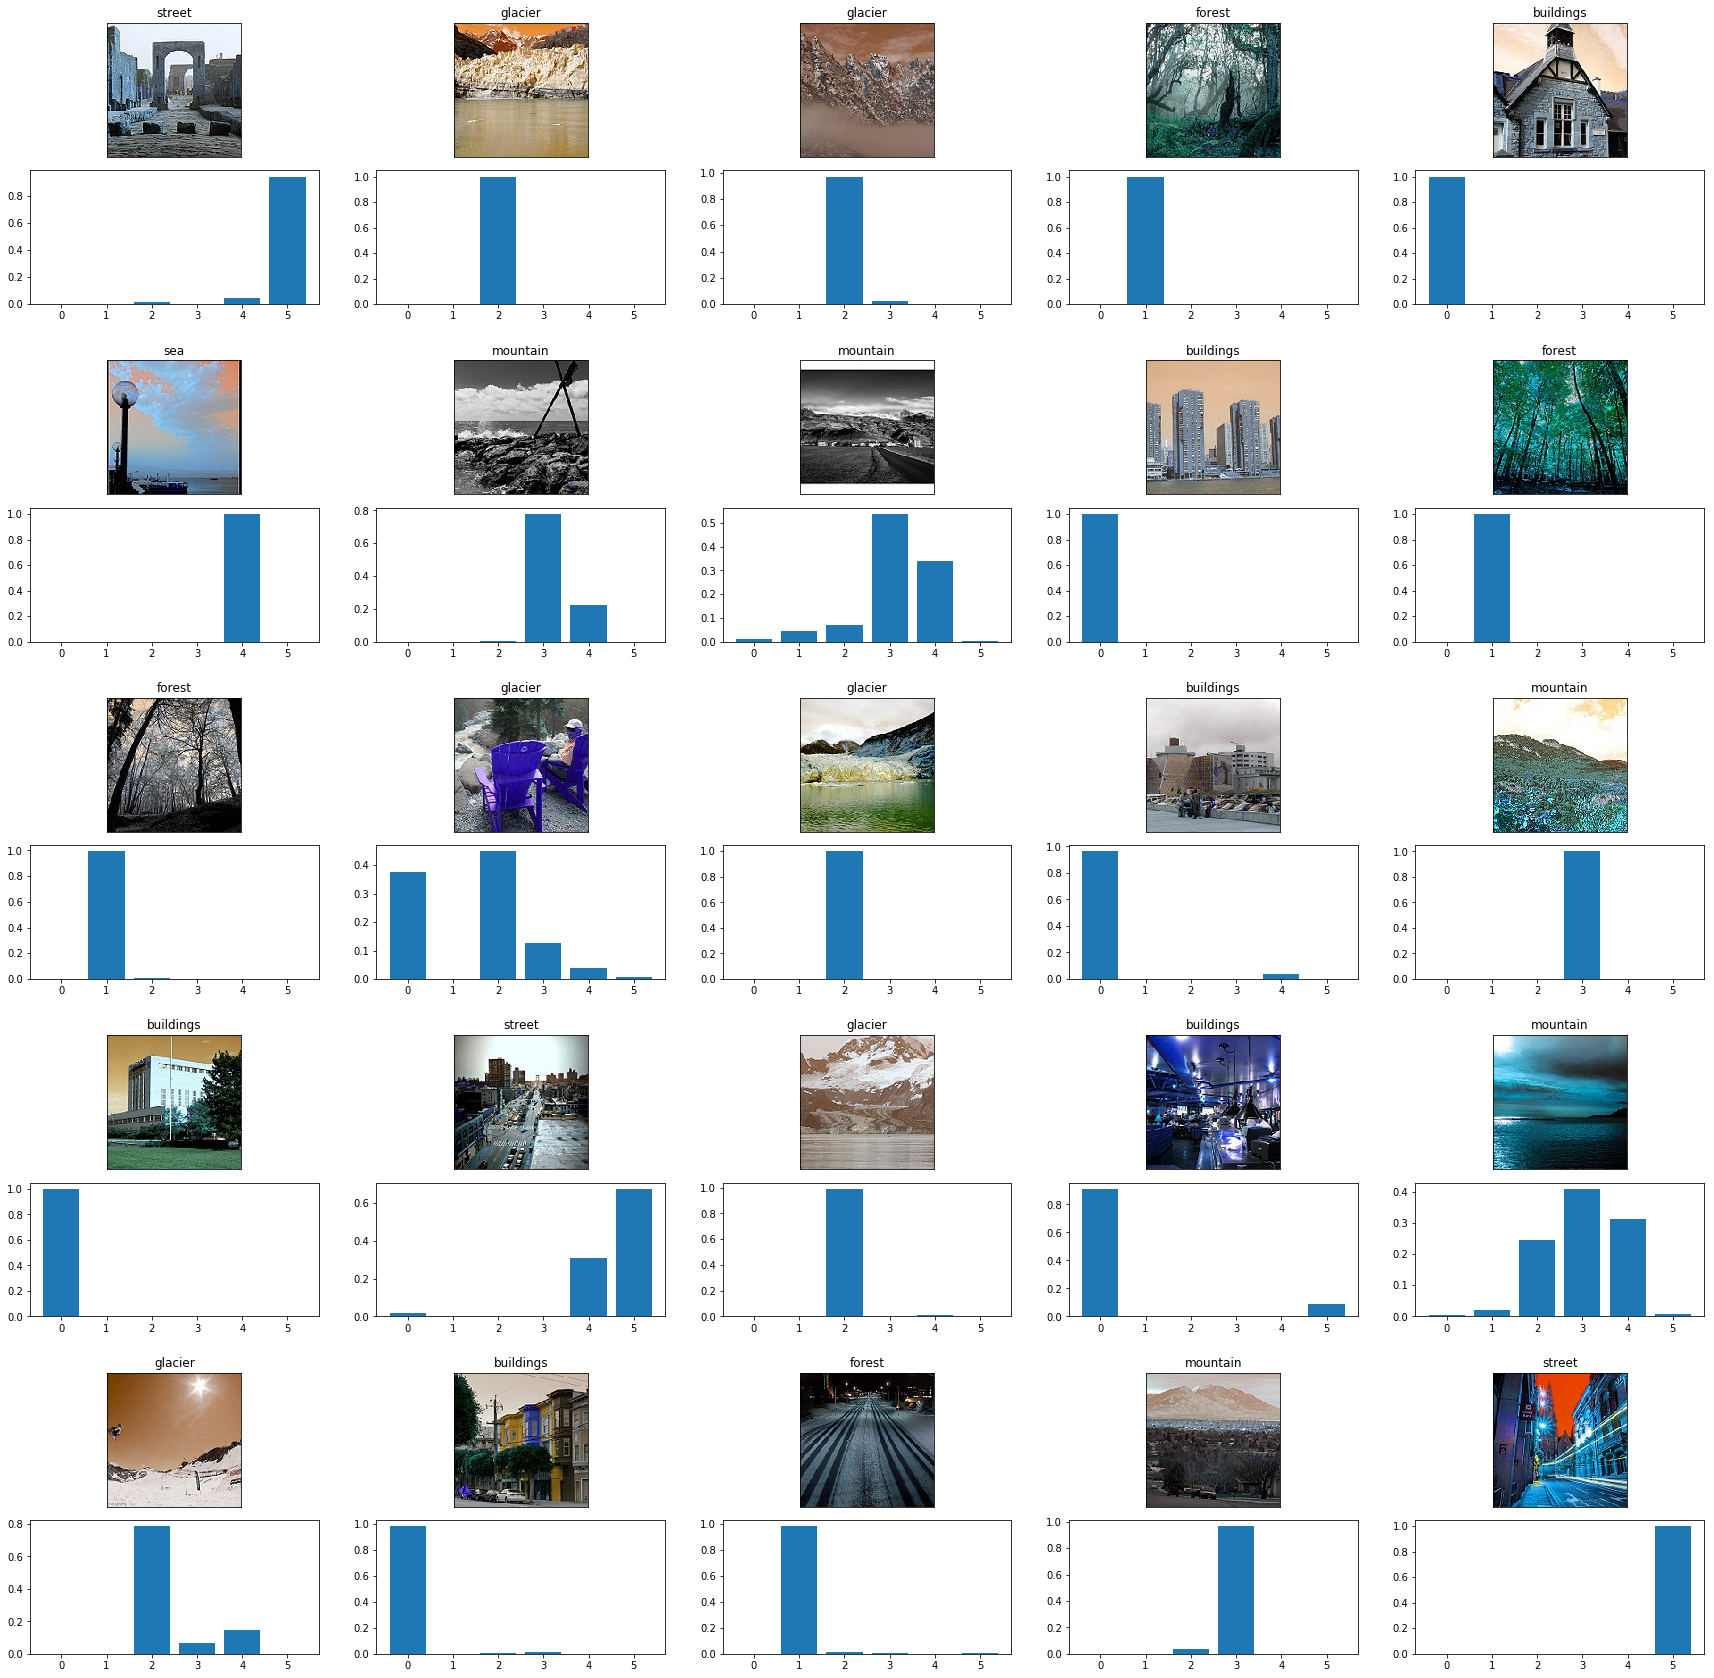

In [148]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

I hope you like my kernel. Feel free to ask any question in the comment section. I am looking forward for your **sugestions**!